<a href="https://colab.research.google.com/github/Gongadachandrasekhar1/Linear_Regression-house_price-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# data Loading
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [13]:
# data training
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(109, 12)
(436,)
(109,)


In [14]:
# train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
mpred = model.predict(X_test)
mpred

array([6360332.81392052, 6274841.29397204, 6491465.71279757,
       5510686.58066066, 4181369.24106618, 2885523.91550026,
       2763522.47558985, 7412430.95457387, 2441833.46929013,
       4472027.70016119, 3808056.09459758, 3647311.37659292,
       4719872.45260812, 4789472.47550406, 5311401.78577502,
       7983201.03395634, 4241829.19846894, 3448263.28413122,
       6721648.44038589, 2698618.85640317, 4541088.54032718,
       5223322.05546595, 5259364.95493767, 3435900.87088657,
       5371454.25917624, 7006772.64005917, 2810208.40344603,
       7374586.00208441, 7656537.6173771 , 4414085.86734643,
       7604494.55854639, 6648321.02410437, 5009078.9803121 ,
       4558375.25277219, 6084943.51554085, 4615889.23150495,
       6542538.43513593, 3405449.54581255, 5012056.66858659,
       5734936.65551556, 3951160.04099086, 3278997.08792198,
       3675598.29596798, 4556073.9359985 , 6376266.62881046,
       3353995.50234441, 4759726.87102659, 2709760.27833656,
       2667485.0387272 ,

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, mpred)

0.6183140939593398

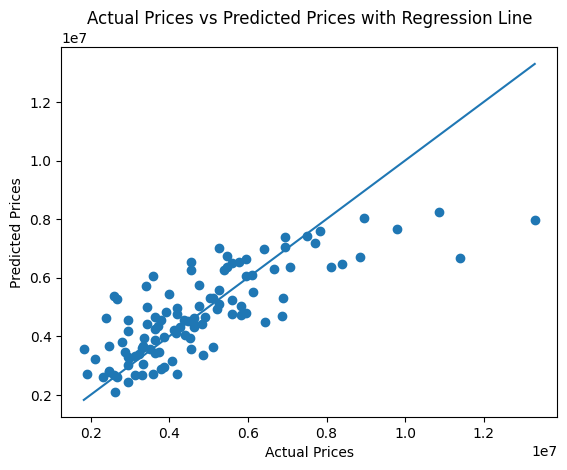

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, mpred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()]) # Add diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices with Regression Line')
plt.show()